In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\hp\Desktop\AI\Datasets\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


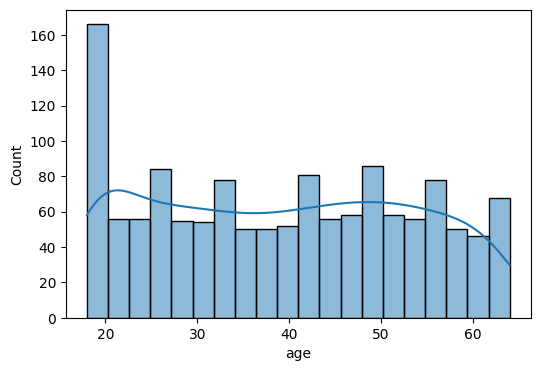

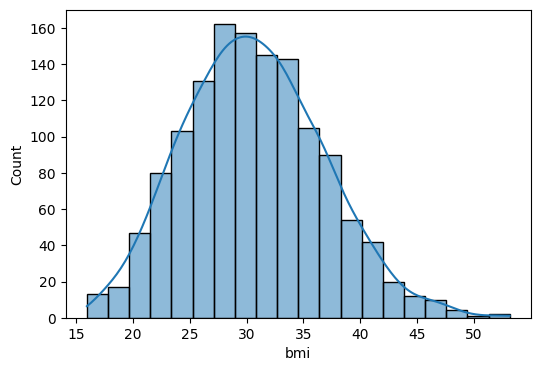

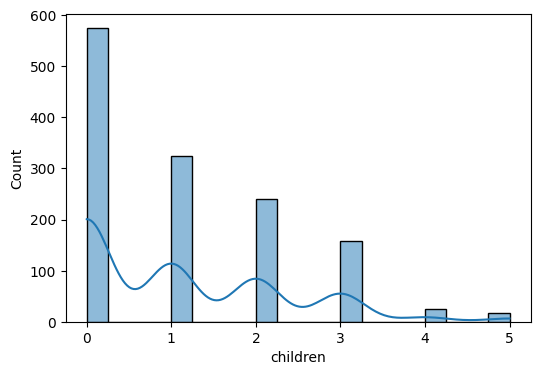

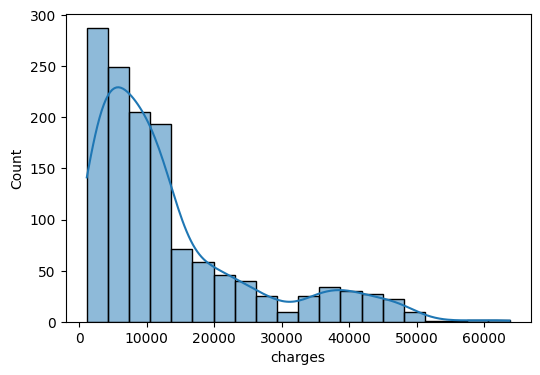

In [10]:
numeric_columns = ['age', 'bmi', 'children','charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde = True,bins = 20)
    

<Axes: xlabel='children', ylabel='count'>

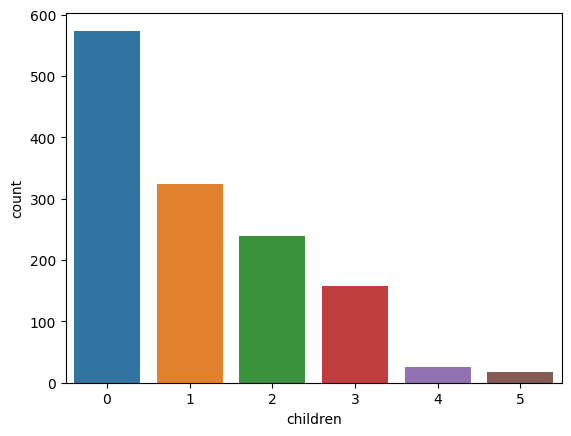

In [11]:
sns.countplot(x = df['children'])


<Axes: xlabel='sex', ylabel='count'>

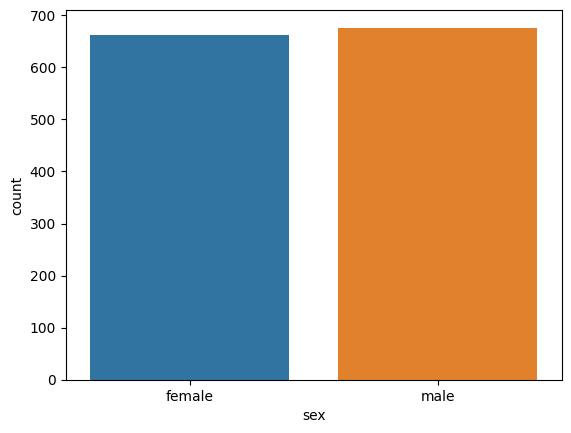

In [12]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

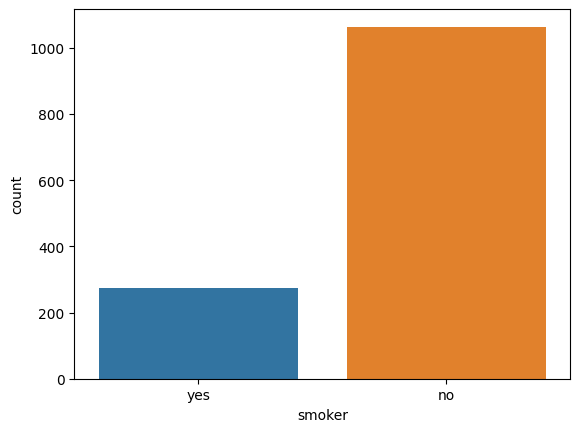

In [13]:
sns.countplot(x = df['smoker'])

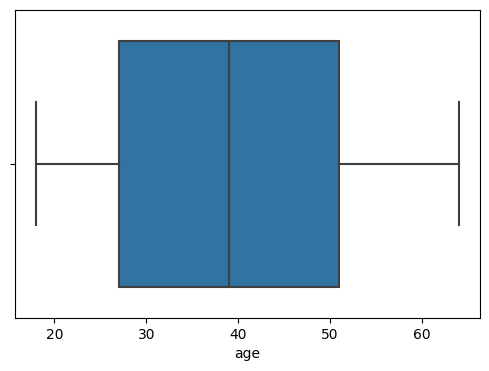

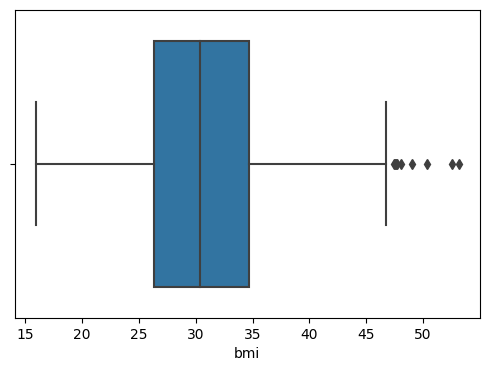

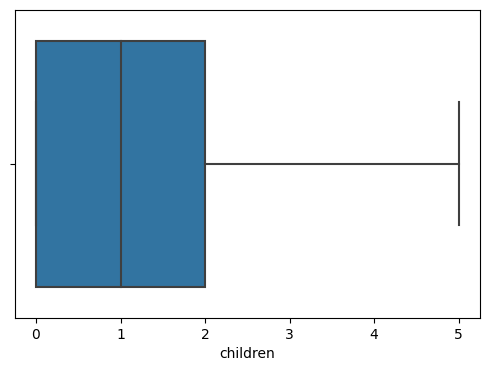

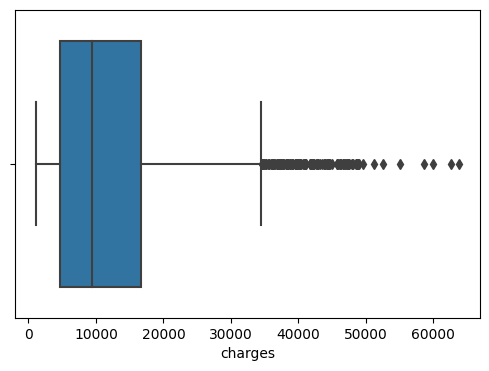

In [14]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x = df[col])

<Axes: >

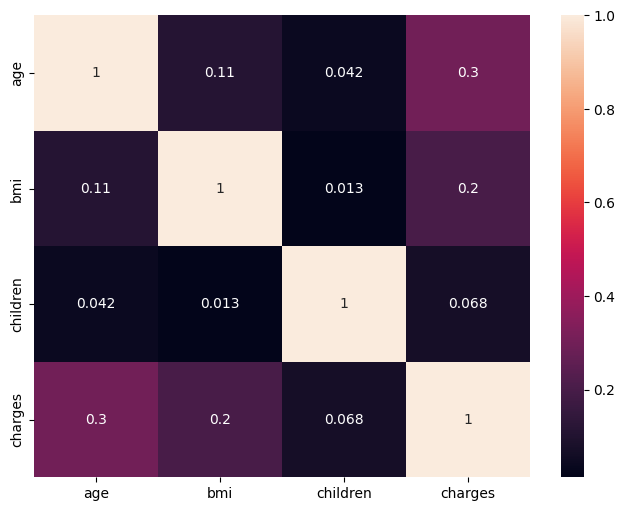

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

## data cleaning and preprocessing

In [16]:
df_cleaned = df.copy()

In [17]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.shape

(1338, 7)

In [19]:
df_cleaned.drop_duplicates(inplace=True)

In [20]:
df_cleaned.shape

(1337, 7)

In [21]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [24]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 0 ,'female': 1})

In [25]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [26]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [27]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'no': 0 ,'yes': 1})


In [28]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [29]:
df_cleaned.rename(columns={
    "sex":"is_female",
    "smoker":"is_smoker"
},inplace=True)

In [30]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [31]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [32]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'], prefix='region', drop_first=True, dtype=int)

In [33]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [34]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0
1334,18,1,31.920,0,0,2205.98080,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,1


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

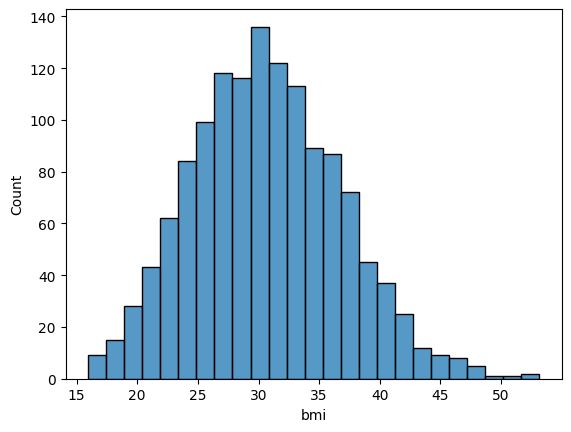

In [35]:
sns.histplot(df['bmi'])

In [36]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
     bins=[0, 18.5, 24.9, 29.9, float('inf')],
     labels=['Underweight', 'Normal', 'Overweight', 'Obese']

)

In [37]:
df_cleaned


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,0,0,1,Overweight
1,18,0,33.770,1,0,1725.55230,0,1,0,Obese
2,28,0,33.000,3,0,4449.46200,0,1,0,Obese
3,33,0,22.705,0,0,21984.47061,1,0,0,Normal
4,32,0,28.880,0,0,3866.85520,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0,Obese
1334,18,1,31.920,0,0,2205.98080,0,0,0,Obese
1335,18,1,36.850,0,0,1629.83350,0,1,0,Obese
1336,21,1,25.800,0,0,2007.94500,0,0,1,Overweight


In [38]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'], prefix='bmi_category', drop_first=True, dtype=int)


In [39]:
df_cleaned
df2 = df_cleaned
df2

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27.900,0,1,16884.92400,0,0,1,0,1,0
1,18,0,33.770,1,0,1725.55230,0,1,0,0,0,1
2,28,0,33.000,3,0,4449.46200,0,1,0,0,0,1
3,33,0,22.705,0,0,21984.47061,1,0,0,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0,0,0,1
1334,18,1,31.920,0,0,2205.98080,0,0,0,0,0,1
1335,18,1,36.850,0,0,1629.83350,0,1,0,0,0,1
1336,21,1,25.800,0,0,2007.94500,0,0,1,0,1,0


In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27.900,0,1,16884.92400,0,0,1,0,1,0
1,18,0,33.770,1,0,1725.55230,0,1,0,0,0,1
2,28,0,33.000,3,0,4449.46200,0,1,0,0,0,1
3,33,0,22.705,0,0,21984.47061,1,0,0,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0,0,1,0


In [42]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler


In [44]:
cols = ['age','bmi','children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [45]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.453160,-0.909234,1,16884.92400,0,0,1,0,1,0
1,-1.511647,0,0.509422,-0.079442,0,1725.55230,0,1,0,0,0,1
2,-0.799350,0,0.383155,1.580143,0,4449.46200,0,1,0,0,0,1
3,-0.443201,0,-1.305052,-0.909234,0,21984.47061,1,0,0,1,0,0
4,-0.514431,0,-0.292456,-0.909234,0,3866.85520,1,0,0,0,1,0


In [46]:
from scipy.stats import pearsonr,chi2_contingency

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298308
1,bmi,0.198401
10,bmi_category_Obese,0.197659
6,region_southeast,0.073578
2,children,0.067389
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058044
8,bmi_category_Normal,-0.105655


In [47]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [48]:
alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,7.654464,0.05372,Accept Null (Drop Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Normal,4.263673,0.234364,Accept Null (Drop Feature)
bmi_category_Overweight,4.201575,0.240504,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [49]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obese']]
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.453160,-0.909234,1,16884.92400,0,0
1,-1.511647,0,0.509422,-0.079442,0,1725.55230,1,1
2,-0.799350,0,0.383155,1.580143,0,4449.46200,1,1
3,-0.443201,0,-1.305052,-0.909234,0,21984.47061,0,0
4,-0.514431,0,-0.292456,-0.909234,0,3866.85520,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,0.050269,1.580143,0,10600.54830,0,1
1334,-1.511647,1,0.206053,-0.909234,0,2205.98080,0,1
1335,-1.511647,1,1.014490,-0.909234,0,1629.83350,1,1
1336,-1.297958,1,-0.797524,-0.909234,0,2007.94500,0,0


In [65]:
final_df.to_csv('new.csv')

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df2.drop('charges',axis=1)
y = df2['charges']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
y_pred = model.predict(X_test)

In [58]:
np.set_printoptions(suppress=True)
y_pred

array([ 6172.41384855,  5528.1024337 , 15378.23063159, 33346.55147536,
        4373.72720848, 10344.14930466, 33104.94791866,  -803.31317509,
        9546.09309113, 12094.86033833, 11209.96918166, 30241.91116498,
       33428.03275617, 15811.883276  , 20500.22643798,  6391.46626061,
        3285.2010575 , 33464.89671885,  -116.28711602,   238.42154793,
        3028.6304687 , 30179.61789024, 15735.69462547, 29896.74089069,
       32787.71382995,  3226.66254538, 33834.19908045, 33859.19166471,
       15024.962764  , 16021.70329741,  3516.8765128 , 10223.43984422,
        -366.44376143, 12066.03048582, 34490.16391027, 14916.30342393,
         120.77419409,  5011.35766433, 29875.51321279,  6127.95520466,
        3773.10067139, 29597.4495849 , 34028.68954517, 15525.14975755,
        5469.729409  ,  -376.44504295,  3658.3919854 ,  5945.79314061,
        -179.80845369,  9631.13921285,  3577.43743185, 10281.96285396,
       29926.37921442,  3375.75642906,  9776.75211331,  9703.70882408,
      

In [59]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2 =  r2_score(y_test, y_pred)
r2

0.828059648028665

In [62]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [63]:
adjusted_r2

0.8199683373476611

In [64]:

# import joblib

# # Save the trained model
# joblib.dump(model, 'linear_regression_model.pkl')

# # Save the scaler
# joblib.dump(scaler, 'scaler.pkl')

# # Save the feature columns
# joblib.dump(X.columns.tolist(), 'columns.pkl')

# print("Model deployment files saved successfully!")
# print("- linear_regression_model.pkl")
# print("- scaler.pkl")
# print("- columns.pkl")